<a href="https://colab.research.google.com/github/alexsoe28/Cat-Facial-Recognition/blob/master/CatProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from google.colab.patches import cv2_imshow
import csv
from tqdm import tqdm
# GLOBAL VARS
datadir = "/content/drive/My Drive/catset/data/"
picsdir = "/content/drive/My Drive/catset/pics/"
maindir = "/content/drive/My Drive/catset/"
# Loading our premade numpy arrays
imarr = np.load(maindir + "imarr.npy")
dataarr = np.load(maindir + "dataarr.npy")

In [ ]:
# looking for the highest resolution
# image for our poster
#imarr = []
maxsize = 0
maxpic = 0
for i in tqdm(range(1,1707)):
  currim = cv2.imread(picsdir + str(i) + '.jpg')
  #ratiox = (150/currim.shape[0])
  #ratioy = (150/currim.shape[1])
  totalsize = currim.shape[0]*currim.shape[1]
  if i == 86 or i == 1158 or i == 551 or i == 1431 or i == 920:
    print("skip")
  elif totalsize > maxsize:
    maxpic = i
    maxsize = totalsize


print(maxpic)
print(maxsize)
#np.save(maindir + "imarr", np.array(imarr))

# Random Testing Functions


In [ ]:
# Asks for user inputted cat photo id
# prints picture of cat with the different points
# from the .cat files circled on the picture 
userinput = ""
while (userinput != "exit"):
  userinput = input("Enter the id ('exit' to exit): ")
  if(userinput == 'exit'):
    break
  #print(userinput)
  testim = cv2.imread(picsdir + userinput + '.jpg')
  with open(datadir + userinput + '.jpg.cat') as file:
    filedata = file.read()
    filedata = filedata.split()
    #print(filedata)
    for i in range(len(filedata)): filedata[i] = int(filedata[i])
    for i in range(1, len(filedata), 2): testim = cv2.circle(testim, (filedata[i],filedata[i+1]), 3, (0,255,0), 2)
  
  cv2_imshow(testim)


In [ ]:
# checking if any of our pictures has more than 9 points on it
for i in tqdm(range(1,1707)):
  with open(datadir + str(i) + '.jpg.cat') as file:
    filedata = file.read()
    filedata = filedata.split()
    if (int(filedata[0]) != 9):
      print("WE ARE SCREWED")


In [ ]:
# Resize TEST
# testing how to do resize 
index = 1
testim = cv2.imread(pics + str(index) + '.jpg')

ratiox = (150/testim.shape[1])
ratioy = (150/testim.shape[0])

testim = cv2.imread(picsdir + str(index) + '.jpg')
cv2_imshow(testim)
testim = cv2.resize(testim, (150,150))
cv2_imshow(testim)

with open(datadir + str(index) + '.jpg.cat') as file:
  newdata =[]
  filedata = file.read()
  filedata = filedata.split()
  for i in range(1, len(filedata)):
    if (i % 2) != 0:
      newdata.append(int(filedata[i])*ratiox)
    else:
      newdata.append(int(filedata[i])*ratioy)
print(newdata)
for i in range(0, len(newdata), 2): testim = cv2.circle(testim, (int(newdata[i]),int(newdata[i+1])), 3, (255,0,0), 1)
cv2_imshow(testim)

# Database Setup Code

In [ ]:
# Converts all file names to 1.jpg ... n.jpg
# Also matches with the corresponding .jpg.cat file and sets to new file namee
# 1.jpg.cat ... n.jpg.cat

import os
ldseg=np.array(os.listdir(pics))

i = 0
for filename in ldseg:
  i = i + 1
  print(filename)
  os.rename(pics + filename, pics + str(i) +".jpg")
  os.rename(data + filename + ".cat", data + str(i) + ".jpg.cat")
print("Total Files: " + str(i))

In [ ]:
# Actual Resizing
# resizes all the photos and saves to a numpy array
# saves numpy array to disk for easy reloading
imarr = []

for i in tqdm(range(1,1707)):
  currim = cv2.imread(pics + str(i) + '.jpg')
  ratiox = (150/currim.shape[0])
  ratioy = (150/currim.shape[1])

  newim = cv2.resize(currim, (150,150))
  imarr.append(newim)
print(np.array(imarr).shape)

np.save(maindir + "imarr", np.array(imarr))

In [ ]:
# Resizing our labels to match with the new 150x150 resolution
# makes an numpy array with all of the new resized labels
# saves the numpy array to the drive to reload latter
dataarr = []
for i in tqdm(range(1, 1707)):
  currim = cv2.imread(picsdir + str(i) + '.jpg')
  ratiox = (150/currim.shape[1])
  ratioy = (150/currim.shape[0])
  with open(datadir + str(i) + '.jpg.cat') as file:
    newdata = []
    filedata = file.read()
    filedata = filedata.split()
    for i in range(1, len(filedata)):
      if (i % 2) != 0:
        newdata.append(int(filedata[i])*ratiox)
      else:
        newdata.append(int(filedata[i])*ratioy)
    dataarr.append(newdata)
    
dataarr = np.array(dataarr)
print(dataarr.shape)
#dataarr = np.delete(dataarr, 0,1)
#print(dataarr.shape)
np.save(maindir + "dataarr", dataarr)

In [ ]:
# Tester for our arrays imarr and dataarr
imarr = np.load(maindir + "imarr.npy")
dataarr = np.load(maindir + "dataarr.npy")
index = 3
currim = imarr[index]
currdata = dataarr[index]
for i in range(0, len(currdata), 2): printim = cv2.circle(currim, (int(currdata[i]),int(currdata[i+1])), 2, (0,255,0), 1)
cv2_imshow(printim)


# KERAS


In [ ]:
# Load some neural network functions we'll be using.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = Input(shape=(150, 150, 3))

# First convolution extracts 4 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

# Your code here
x = Conv2D(filters=30, kernel_size=(3,3))(img_input)
x = MaxPooling2D(pool_size=(2,2))(x)
# Second convolution extracts 5 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

# Your code here
x = Conv2D(filters=10, kernel_size=(3,3))(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Third convolution extracts 10 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

# Your code here
x = Conv2D(filters=10, kernel_size=(3,3))(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers

# Your code here
x = Flatten()(x)
# Create a fully connected (dense) layer with ReLU activation and 20 hidden units

# Your code here
x = Dense(50, activation='relu')(x)
x = Dropout(0.25)(x)
# Create output layer with a single node and sigmoid activation

# Your code here
output = Dense(18, activation='relu')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
#model.summary()

In [ ]:
model.summary()

In [ ]:
np.random.seed(1)
#1337 works
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
history = model.fit(
      x=imarr,
      y=dataarr,
      epochs = 200,
      batch_size = 150,
      validation_split=0.2)

In [ ]:
# Print the Graphs
import matplotlib.pyplot as plt
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

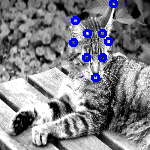

(1, 150, 150, 3)
[[47.526978 56.509483 67.40745  57.415222 56.417465 73.78791  35.513096
  46.53421  33.750904 22.953648 48.581657 36.995106 67.44479  38.140987
  83.98279  25.036028 80.59153  49.423946]]


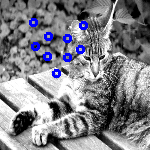

In [ ]:
# Predicts the points on a given image with our model
# prints the output with the given points highlighted
# on the picture
index = 1431
currim = imarr[index]
currdata = dataarr[index]
for i in range(0, len(currdata), 2): printim = cv2.circle(currim, (int(currdata[i]),int(currdata[i+1])), 3, (255,0,0), 2)
cv2_imshow(printim)
testim = cv2.imread(picsdir + str(index+1) + ".jpg")

#testim = cv2.imread(maindir + "test2.jpg")

testim = cv2.resize(testim, (150,150))

testimarr = []
testimarr.append(testim)
testimarr = np.array(testimarr)
print(testimarr.shape)

features = model.predict(testimarr)
print(features)
for i in range(0, len(features[0]), 2): printim = cv2.circle(testim, (int(features[0][i]),int(features[0][i+1])), 3, (255,0,0), 2)
cv2_imshow(printim)

In [ ]:
# same as above but resizes the output points
# to the full previous resolution
# then highlights the points on the full res picture
index = 179

correctim = cv2.imread(picsdir + str(index) + '.jpg')
with open(datadir + str(index) + '.jpg.cat') as file:
  filedata = file.read()
  filedata = filedata.split()
  #print(filedata)
  for i in range(len(filedata)): filedata[i] = int(filedata[i])
  for i in range(1, len(filedata), 2): correctim = cv2.circle(correctim, (filedata[i],filedata[i+1]), 5, (0,255,0), 2)

cv2_imshow(correctim)

testim = cv2.imread(picsdir + str(index) + ".jpg")


testim = cv2.resize(testim, (150,150))

testimarr = []
testimarr.append(testim)
testimarr = np.array(testimarr)
print(testimarr.shape)

features = model.predict(testimarr)

currim = cv2.imread(picsdir + str(index) + '.jpg')
ratiox = (150/currim.shape[0])
ratioy = (150/currim.shape[1])

testim = currim
for i in range(0, len(features[0]), 2): testim = cv2.circle(testim, (int(features[0][i] / ratiox),int(features[0][i+1] / ratioy)), 5, (0,255,0), 2)
cv2_imshow(testim)

#np.save(maindir + "imarr", np.array(imarr))